In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

### Establishing dataframes to be explored

In [2]:
reviews_df = pd.read_csv('reviews.csv')
playbill_df = pd.read_csv('playbill.csv')

In [3]:
showavg = playbill_df.groupby('show_title').mean().round(2)

Just to get to know my dataframes better I'll be sorting them by different values, which will also let me double check that the cleaning and wrangling I did was enough.

### Top Shows

##### By weekly gross

In [4]:
showavg.sort_values(by='week_gross', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Morrissey,2019.00,1881374.00,186.55,397.00,10085.00,1495.00,7.00,96.37
El Mago Pop,2023.00,1670913.00,164.90,317.50,9054.00,1018.00,7.00,91.97
Wicked,2012.68,1615595.98,113.33,265.51,14206.44,1827.69,7.99,96.97
To Kill A Mockingbird,2019.40,1604341.86,143.86,423.30,11031.69,1435.12,7.24,98.84
Jonas Brothers,2023.00,1556128.00,192.35,192.35,8090.00,1618.00,5.00,100.00
Harry Potter and the Cursed Child,2020.46,1548985.23,127.71,290.03,12115.53,1615.76,7.60,95.05
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90


I'm not surprised that Hamilton is at the top; what I am surprised about though is that in the midst of the late 2010's and early 2020's there's Wicked in 2012/2013 holding the 5th highest spot.

We have 3 musicals, 3 musical residencies, 2 plays, and 2 solo shows. El Mago Pop really stood out to me - a magic show holding the fourth highest weekly gross! 

##### By average ticket price

In [5]:
showavg.sort_values(by='avg_ticket', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
Merrily We Roll Along,2023.00,1304508.00,225.07,499.00,5796.00,966.00,0.00,100.00
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90
Plaza Suite,2022.00,1442841.76,207.26,499.81,6988.15,975.00,5.50,98.56
Mel Brooks on Broadway,2019.00,583140.00,196.54,297.00,2967.00,1495.00,2.00,99.23
Jonas Brothers,2023.00,1556128.00,192.35,192.35,8090.00,1618.00,5.00,100.00
Morrissey,2019.00,1881374.00,186.55,397.00,10085.00,1495.00,7.00,96.37
Funny Girl,2022.47,1437019.55,164.93,164.93,8579.86,1219.00,7.49,89.48


4 of these shows didn't appear in the top weekly gross list, which is unfortuante considering the high ticket price.

Our genre breakdown has shifted slightly: we have 3 musicals, 3 solo shows, 2 plays, and 2 musical residencies

##### By top ticket price

In [6]:
showavg.sort_values(by='top_ticket', ascending=False).head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Dave Chappelle Live on Broadway,2019.00,1534756.00,212.44,748.00,6706.50,1504.00,5.00,98.90
Manilow on Broadway,2013.00,693452.67,120.98,700.00,5905.33,1631.00,4.17,81.26
Hamilton,2018.83,2503591.32,235.86,628.92,10598.79,1322.13,7.89,100.64
"Hello, Dolly!",2013.59,1463679.94,136.85,510.66,10390.57,1441.39,7.24,93.49
Springsteen On Broadway,2017.77,2174210.53,505.90,505.90,4299.71,947.54,4.40,99.99
Plaza Suite,2022.00,1442841.76,207.26,499.81,6988.15,975.00,5.50,98.56
Merrily We Roll Along,2023.00,1304508.00,225.07,499.00,5796.00,966.00,0.00,100.00
Kristin Chenoweth: For The Girls,2019.00,969894.00,101.20,473.00,9584.00,1198.00,8.00,100.00
Manilow Broadway,2019.00,866512.15,160.66,447.00,5411.75,1504.00,4.25,84.40


I'm very surprised at these results - with how popular Hamilton has been, I was fully expecting it to be number one in this list. Another surprise is that we have two entries of (essentially) the same show - Manilow on Broadway in 2013 and Manilow Broadway in 2019.

Our genre breakdown for this section is as follows: 4 solo shows, 3 musicals, 2 plays, and 1 musical residency

### Bottom Shows

I don't have a lot to say about the results for these first few dataframes because I don't recognize any of the shows, so I'll just provide the genre list for each one.

##### By weekly gross

In [7]:
showavg.sort_values(by='week_gross').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
A Mom's Life,1998.00,3874.33,25.56,40.00,148.00,1004.0,1.00,14.74
Senator Joe,1989.00,5661.00,12.04,12.04,470.00,1334.0,0.00,11.74
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Marc Salem's Mind Games on Broadway,2004.00,11995.71,42.98,56.26,286.08,712.0,1.25,36.14
So Long on Lonely Street,1986.00,14957.38,11.80,11.80,1414.12,499.0,6.62,37.70
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Stand-Up Tragedy,1990.00,18581.50,19.06,19.06,1064.50,499.0,3.25,35.34
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09
As Long as We Both Shall Laugh,2003.00,23605.50,24.35,65.00,1018.36,740.0,1.07,79.68


The breakdown for this list is: 3 plays, 3 musicals, 2 solo shows, and 2 special shows

##### By average ticket price

In [8]:
showavg.sort_values(by='avg_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Mort Sahl on Broadway!,1987.00,48203.75,8.82,8.82,5582.25,1336.0,6.50,56.16
The Cemetery Club,1990.00,42441.00,9.71,9.71,4654.00,1090.0,6.00,53.37
Danny Gans on Broadway: The Man of Many Voices,1995.00,42181.00,10.11,40.00,4135.50,1346.0,3.00,36.04
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Miss Margarida's Way,1990.00,29349.33,10.51,10.51,2766.67,565.0,3.67,77.41
Our Country's Good,1991.00,64134.12,11.34,11.34,5620.62,1160.0,6.00,64.94
Late Nite Comic,1987.00,32552.33,11.36,11.36,2818.67,898.0,1.33,51.18
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09


The breakdown for this list is: 3 musicals, 3 solo shows, 2 special shows, and 2 plays

##### By top ticket price

In [9]:
showavg.sort_values(by='top_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
"Mummenschanz: ""The New Show""",1986.00,10000.00,8.33,8.33,1200.00,499.0,8.00,30.06
Mort Sahl on Broadway!,1987.00,48203.75,8.82,8.82,5582.25,1336.0,6.50,56.16
The Cemetery Club,1990.00,42441.00,9.71,9.71,4654.00,1090.0,6.00,53.37
A Change in the Heir,1990.00,17151.40,10.16,10.16,1609.00,499.0,4.60,41.70
Miss Margarida's Way,1990.00,29349.33,10.51,10.51,2766.67,565.0,3.67,77.41
Our Country's Good,1991.00,64134.12,11.34,11.34,5620.62,1160.0,6.00,64.94
Late Nite Comic,1987.00,32552.33,11.36,11.36,2818.67,898.0,1.33,51.18
Oh Coward!,1986.11,20555.56,11.42,11.42,1800.00,499.0,6.22,45.09
Comedy Tonight,1994.00,67257.00,11.43,11.43,5990.50,737.0,4.50,121.02


The breakdown for this list is nearly the same as our average ticket price list, with So Long on Lonely Street being the only new title.

The list is: 3 musicals, 3 plays, 2 solo shows, and 2 special shows

Out of curiosity, I'm going to narrow the year field to 2010 and beyond, since I'm assuming these ticket prices from the 80's and 90's haven't scaled well with inflation.

##### By average ticket price since 2010

In [10]:
showavg[showavg['year'] >= 2010].sort_values(by='avg_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Home for the Holidays,2017.00,68830.85,24.35,368.64,2944.14,1228.00,6.71,33.01
High,2011.00,89991.00,26.03,250.00,3622.40,780.00,1.40,64.23
Leap of Faith,2012.00,223973.33,26.83,225.00,8336.83,1367.00,3.17,83.76
The Velocity of Autumn,2014.00,108923.40,28.85,173.00,3858.60,762.80,3.20,66.72
Living on Love,2015.00,162229.60,30.10,275.00,5464.40,1073.00,3.20,69.22
Magic/Bird,2012.00,142012.75,32.91,202.50,4305.75,1077.00,4.62,52.30
Holler If Ya Hear Me,2014.00,172782.57,33.55,173.00,5308.71,1104.43,5.43,61.62
Elling,2010.00,171709.25,34.88,225.00,5166.25,1056.00,2.25,63.10
Lysistrata Jones,2011.25,169407.00,35.44,199.00,4787.00,945.00,3.75,64.10


I was actually surprised to see that average ticket prices didn't increase as much as I thought. Even for less popular shows I was sure tickets would be at least $40.

The breakdown in show types is: 5 plays, 3 musicals, and 2 special shows.

##### By top ticket price since 2010

In [11]:
showavg[showavg['year'] >= 2010].sort_values(by='top_ticket').head(10)

,year,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,
Skeleton Crew,2022.00,160411.43,37.76,37.76,4003.14,575.0,4.29,92.60
Airline Highway,2015.00,152110.50,41.83,41.83,3670.80,627.0,5.30,74.92
Pass Over,2021.00,182920.20,42.20,42.20,4530.60,1273.5,5.70,47.59
Collected Stories,2010.00,134863.90,42.38,42.38,3223.90,650.0,5.40,64.79
The People in the Picture,2011.00,205785.17,43.91,43.91,4719.42,997.0,5.00,63.16
Don't Dress For Dinner,2012.00,177505.83,44.25,44.25,4035.00,728.0,5.08,71.64
Everyday Rapture,2010.00,196524.92,44.79,44.79,4447.17,740.0,7.08,75.12
Chicken & Biscuits,2021.00,143533.63,44.90,44.90,3470.22,751.0,4.56,71.80
Trouble in Mind,2021.18,155797.52,45.26,45.26,3367.36,727.0,5.27,65.99


This is much more interesting for me to look at and see the dates for these lowest ranking shows!

The breakdown for this list is also notable because it features *8* plays and 2 musicals. All of our other lists so far have had at least 3 types of shows, so this was surprising!

Lastly, before I move on to the reviews dataframe I'm going to look at the highest reoccurring shows in the Playbill dataframe.

In [12]:
playbill_df['show_title'].value_counts()[:10]

The Phantom of the Opera    1751
Chicago                     1319
The Lion King               1268
Les Misérables              1035
Wicked                       957
Cats                         873
Mamma Mia!                   723
Beauty and the Beast         682
Rent                         644
Jersey Boys                  587
Name: show_title, dtype: int64

Phantom of the Opera was a surprise to see since it premiered about 10 years after Chicago. I was also surprised to see that Wicked hadn't broken into the thousands, though by the time this analysis is done it may have hit that milestone.

## Exploring the reviews

Before I dive into anything sentiment related, I'm just going to take a peek at the top highest rated reviews and top lowest rated reviews.

##### Sorted by highest rating

In [13]:
reviews_df.sort_values(by='rating', ascending=False).head(10)

,article_title,body,rating,rating_sent,show_title
357,Avenue Q,The New York Theatre Guide last reviewed the N...,5,Excellent,Avenue Q
333,Review of WP Theater/Second Stage Theater's Ou...,Quiet. Small. Submissive. What happens when th...,5,Excellent,Our Dear Dead Drug Lord
131,The Book of Mormon,An old friend of mine turned Mormon on me a fe...,5,Excellent,The Book of Mormon
261,'Kristina Wong: Sweatshop Overlord' review - a...,"In the beginning of the show ', 'Kristina Wong...",5,Excellent,Kristina Wong: Sweatshop Overlord
123,Dear Evan Hansen,When my eyes are wet and it's all I can do to ...,5,Excellent,Dear Evan Hansen
122,The Phantom of the Opera,Join me for a little jaunt down memory lane to...,5,Excellent,The Phantom of the Opera
320,"Review of Macbeth, starring Corey Stoll, at Cl...","A heralded Scottish general, contented with wh...",5,Excellent,The Tragedy of Macbeth
120,Review of Harry Potter and the Cursed Child on...,Today I've got magic on my mind.\xa0The Harry ...,5,Excellent,Harry Potter and the Cursed Child
321,Review of The Michaels at the Public Theater,"Commissioned by the ', 'Public Theater', ', ',...",5,Excellent,The Michaels
115,Review of Once on This Island on Broadway,"The musical ', 'Once on This Island', ' has he...",5,Excellent,Once on This Island


##### Sorted by lowest rating

In [14]:
reviews_df.sort_values(by='rating').head(10)

,article_title,body,rating,rating_sent,show_title
250,'Black No More' Off-Broadway review — a talent...,"The nicest thing I can say about ', 'Black No ...",1,oor,Black No More
301,Review of Mint Theater Company's Chekhov/Tolst...,"The applause was tepid, and the cast, sensing ...",1,oor,An Artist's Story
100,Review of The Lightning Thief: The Percy Jacks...,"Percy Jackson has a problem - well, a few, act...",2,Below Average,The Lightning Thief
75,'Diana: The Musical' review — 'a vacant and va...,An enduring global icon nearly 25 years after ...,2,Below Average,Diana: The Musical
204,‘Oresteia’ at Park Avenue Armory review — a mu...,Anastasia Hille is doing the most right now. S...,2,Below Average,Oresteia
275,'Autumn Royal' review — an endless waiting gam...,"The 2017 world premiere of\xa0', 'Autumn Royal...",2,Below Average,Autumn Royal
274,‘Letters of Suresh’ review – all talk and litt...,"In theatre, an oft-cited rule is that acting i...",2,Below Average,Letters to Suresh
271,‘Regina Comet’ review - featherweight new musi...,"There is a tantalising, but all-too-brief mome...",2,Below Average,A Commercial Jingle For Regina Comet
175,'Cornelia Street' review — hardworking cast ca...,"Read our review of ', 'Cornelia Street', "", st...",2,Below Average,Cornelia Street
262,"'The Visitor' review - a well-intentioned, yet...","There has been much drama around\xa0', 'The Vi...",2,Below Average,The Visitor


Oops, looks like something went awry when getting the rating sentiment for the 1 star reviews.  

In [15]:
reviews_df.iloc[250, 3] = 'Poor'
reviews_df.iloc[301, 3] = 'Poor'

In [16]:
reviews_df.sort_values(by='rating').head(10)

,article_title,body,rating,rating_sent,show_title
250,'Black No More' Off-Broadway review — a talent...,"The nicest thing I can say about ', 'Black No ...",1,Poor,Black No More
301,Review of Mint Theater Company's Chekhov/Tolst...,"The applause was tepid, and the cast, sensing ...",1,Poor,An Artist's Story
100,Review of The Lightning Thief: The Percy Jacks...,"Percy Jackson has a problem - well, a few, act...",2,Below Average,The Lightning Thief
75,'Diana: The Musical' review — 'a vacant and va...,An enduring global icon nearly 25 years after ...,2,Below Average,Diana: The Musical
204,‘Oresteia’ at Park Avenue Armory review — a mu...,Anastasia Hille is doing the most right now. S...,2,Below Average,Oresteia
275,'Autumn Royal' review — an endless waiting gam...,"The 2017 world premiere of\xa0', 'Autumn Royal...",2,Below Average,Autumn Royal
274,‘Letters of Suresh’ review – all talk and litt...,"In theatre, an oft-cited rule is that acting i...",2,Below Average,Letters to Suresh
271,‘Regina Comet’ review - featherweight new musi...,"There is a tantalising, but all-too-brief mome...",2,Below Average,A Commercial Jingle For Regina Comet
175,'Cornelia Street' review — hardworking cast ca...,"Read our review of ', 'Cornelia Street', "", st...",2,Below Average,Cornelia Street
262,"'The Visitor' review - a well-intentioned, yet...","There has been much drama around\xa0', 'The Vi...",2,Below Average,The Visitor


I'm a little disappointed there aren't more 1 star reviews, but there's at least a decent handful of 2 stars.

Since I can see that the article bodies didn't get scraped completely cleanly, I'm going to pull the review for The Visitor and see what needs to be done

In [17]:
test = reviews_df.iloc[262]['body']
test

'There has been much drama around\\xa0\', \'The Visitor\', \',\\xa0\', \'the new Tom Kitt, Brian Yorkey, and Kwame Kwei-Armah musical. The show\\\'s opening last year was delayed because of the COVID-19 pandemic. Then when it was scheduled to return this fall, the first two preview performances of the musical were postponed to, per the Public\\\'s statement, "accommodate for more time for the company to address questions about race, representation, and identity." Then one of \', \'The Visitor\', "\'s stars, Tony winner Ari\'el Stachel, departed the musical. Why would Stachel, who had been part of the musical\'s development process for six years, leave it right before opening night?\\xa0", \'There is a possible answer, and it points to the fundamental flaw in \', \'The Visitor\', \' itself.\\xa0\', \'The Visitor,\\xa0\', "based on the 2007 film of the same name, follows college professor Walter, who is white and suffering from grief at the death of his wife. Through chance, he meets Syr

In [18]:
test_clean = test.replace('\\xa0', '').replace('\\u200b', '').replace('\\\\\\', '\\').replace('\\', '')
test_clean

'There has been much drama around\', \'The Visitor\', \',\', \'the new Tom Kitt, Brian Yorkey, and Kwame Kwei-Armah musical. The show\'s opening last year was delayed because of the COVID-19 pandemic. Then when it was scheduled to return this fall, the first two preview performances of the musical were postponed to, per the Public\'s statement, "accommodate for more time for the company to address questions about race, representation, and identity." Then one of \', \'The Visitor\', "\'s stars, Tony winner Ari\'el Stachel, departed the musical. Why would Stachel, who had been part of the musical\'s development process for six years, leave it right before opening night?", \'There is a possible answer, and it points to the fundamental flaw in \', \'The Visitor\', \' itself.\', \'The Visitor,\', "based on the 2007 film of the same name, follows college professor Walter, who is white and suffering from grief at the death of his wife. Through chance, he meets Syrian refugee Tarek, who is at 

This isn't the cleanest text to exist, but it's definitely a lot better than how it started out as.

I'll apply this to the rest of the reviews, grab another review from the dataframe, and see if there's anything else that The Visitor review didn't have.

In [19]:
reviews_df['body'] = reviews_df['body'].apply(lambda x: x.replace('\\xa0', '').replace('\\u200b','').replace('\\\\\\', '').replace('\\',''))

In [20]:
test2 = reviews_df.iloc[274]['body']
test2

'In theatre, an oft-cited rule is that acting is reacting. So what are the characters of playwright Rajiv Joseph\'s ", \'Letters to Suresh\', " to do when all they\'ve been tasked with is reciting the contents of their exposition-heavy letters aloud in direct address to the audience? The answer is to serve as talking heads for material that feels better suited for an article in The New Yorker than it does for an Off-Broadway play.", "The plot revolves around an origami genius named Suresh (Ramiz Monsef) who strikes up an unlikely correspondence with Father Hashimoto (Thom Semsa), a priest in Nagasaki, Japan. Suresh\'s letters are discovered by Melody (Ali Ahn), Hashimoto\'s grand-niece, after his untimely death. She never met the man, but feels compelled to return Suresh\'s letters to him. This impulse sets off a series of flashbacks, which reveal that teenage Suresh met Hashimoto while attending an origami festival in Nagasaki. Hashimoto is taken with Suresh\'s paper-folding skills an

Seems like I didn't miss anything - the articles are a lot easier to look at now, at least.

Below I'll visualize the count of reviews in each rating group.

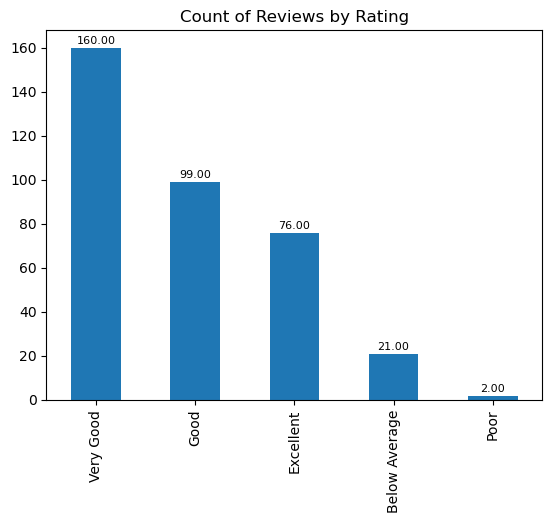

In [21]:
plots = reviews_df['rating_sent'].value_counts().plot(kind='bar', title='Count of Reviews by Rating')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')

I'm actually surprised to see the difference between the amount of 'Good' and 'Excellent' ratings - since I had seen that there were only two 'Poor' reviews I assumed that the critics writing these reviews we being pretty lenient on how they rated, but they were fairly conservative in handing out 5 stars.

I'm going to save the dataframe as a new csv file so that in the modeling notebook I can quickly accessed this clean verison.

In [22]:
reviews_df.to_csv('reviews_clean.csv')

## Exploring sentiment details

In [23]:
df = reviews_df.copy()
df

,article_title,body,rating,rating_sent,show_title
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window
1,'Alex Edelman: Just For Us' review — solo show...,"Read our five-star review of ', 'Just For Us',...",5,Excellent,Just For Us
2,'Back to the Future' review — 1.21 gigawatts o...,"Read our four-star review of ', 'Back to the F...",4,Very Good,Back to the Future
3,'The Cottage' review — an over-the-top comedy ...,"Read our four-star review of ', 'The Cottage',...",4,Very Good,The Cottage
4,'Purlie Victorious' review — hilarious satire ...,"Read our five-star review of ', 'Purlie Victor...",5,Excellent,Purlie Victorious: A Non-Confederate Romp Thro...
...,...,...,...,...,...
353,Review of Fiddler on the Roof (in Yiddish) at ...,"Full disclosure - I saw Zero Mostel in', 'Fidd...",4,Very Good,Fiddler on the Roof
354,Review of the Public Theater's Shakespeare in ...,"This production of ', 'Much Ado About Nothing'...",5,Excellent,Much Ado About Nothing
355,Latin History for Morons,NOTE: This is a review of the Off-Broadway pre...,4,Very Good,Latin History for Morons
356,The Piano Lesson,This is a production of substance and grace. I...,5,Excellent,The Piano Lesson


### spaCy

To start out, I'm going to look at the sentiment of each article, look at the range of scores that I have, and then run the article titles through the same pipeline to see how much an article's title reflects the sentiment of the body.

In [24]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [25]:
label = []
score = []
subjectivity = []
article_pos = []
article_neg = []

for index, review in df.iterrows():
    text = review['body']
    doc = nlp(text)
    sentiment = round(doc._.blob.polarity, 2)
    subj = round(doc._.blob.subjectivity, 2)
    
    if sentiment > 0:
        sent_label = 'Positive'
    else:
        sent_label = 'Negative'
        
    label.append(sent_label)
    score.append(sentiment)
    subjectivity.append(subj)
    
    for x in doc._.blob.sentiment_assessments.assessments:
        if x[1] > 0:
            article_pos.append(x[0][0])
        elif x[1] < 0:
            article_neg.append(x[0][0])
        else:
            pass
        
df['article_score'] = score
df['article_label'] = label
df['article_subjectivity'] = subjectivity
df

,article_title,body,rating,rating_sent,show_title,article_score,article_label,article_subjectivity
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window,0.19,Positive,0.48
1,'Alex Edelman: Just For Us' review — solo show...,"Read our five-star review of ', 'Just For Us',...",5,Excellent,Just For Us,0.11,Positive,0.40
2,'Back to the Future' review — 1.21 gigawatts o...,"Read our four-star review of ', 'Back to the F...",4,Very Good,Back to the Future,0.08,Positive,0.38
3,'The Cottage' review — an over-the-top comedy ...,"Read our four-star review of ', 'The Cottage',...",4,Very Good,The Cottage,0.13,Positive,0.53
4,'Purlie Victorious' review — hilarious satire ...,"Read our five-star review of ', 'Purlie Victor...",5,Excellent,Purlie Victorious: A Non-Confederate Romp Thro...,0.09,Positive,0.40
...,...,...,...,...,...,...,...,...
353,Review of Fiddler on the Roof (in Yiddish) at ...,"Full disclosure - I saw Zero Mostel in', 'Fidd...",4,Very Good,Fiddler on the Roof,0.16,Positive,0.43
354,Review of the Public Theater's Shakespeare in ...,"This production of ', 'Much Ado About Nothing'...",5,Excellent,Much Ado About Nothing,0.23,Positive,0.52
355,Latin History for Morons,NOTE: This is a review of the Off-Broadway pre...,4,Very Good,Latin History for Morons,0.07,Positive,0.48
356,The Piano Lesson,This is a production of substance and grace. I...,5,Excellent,The Piano Lesson,0.20,Positive,0.52


Looking at the range of scores:

In [26]:
df['article_score'].describe()

count    358.000000
mean       0.125335
std        0.064749
min       -0.070000
25%        0.080000
50%        0.130000
75%        0.170000
max        0.320000
Name: article_score, dtype: float64

I'm very curious to see what reviews got the minimum and maximum, so I take a look and...

In [27]:
df[df['article_score'] == -0.07]

,article_title,body,rating,rating_sent,show_title,article_score,article_label,article_subjectivity
338,"Review of Audible's the way she spoke, starrin...",It is is snowing inJuárez?It never snows inJuá...,5,Excellent,The Way She Spoke,-0.07,Negative,0.46


5 stars. Interesting. Let's take a look at the maximum:

In [28]:
df[df['article_score'] == 0.32]

,article_title,body,rating,rating_sent,show_title,article_score,article_label,article_subjectivity
348,Review of Dr. Seuss' How The Grinch Stole Chri...,"Gavin Lee', ', as that wonderfully despicable ...",5,Excellent,Dr. Seuss' How The Grinch Stole Christmas!,0.32,Positive,0.53


Also 5 stars. Well, that makes sense, at least. I'm going to look at the total counts for the labels, and...

In [29]:
df['article_label'].value_counts()

Positive    345
Negative     13
Name: article_label, dtype: int64

We already know from our bar graph earlier that we should have 23 negative labels, so the articles likely have wording that doesn't reflect the score the critic gave them. I'm going to take a look at the distribution of the article score:

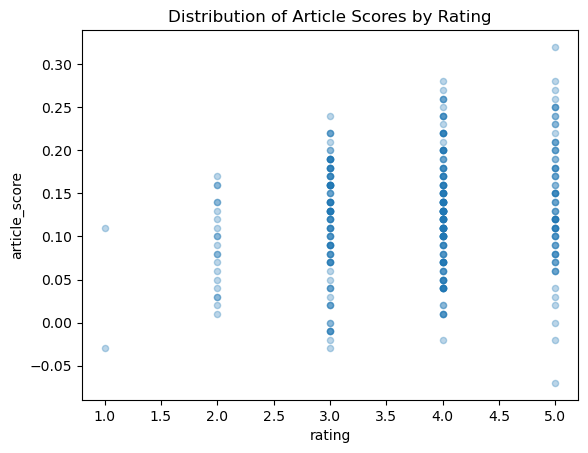

In [30]:
df.plot(x='rating', y='article_score', kind='scatter', alpha=0.3, title='Distribution of Article Scores by Rating')
plt.show()

It's very fascinating that one of the one star reviews scored fairly high, but I can also see there's a range where a lot of the other reviews fall into that this one follows as well.

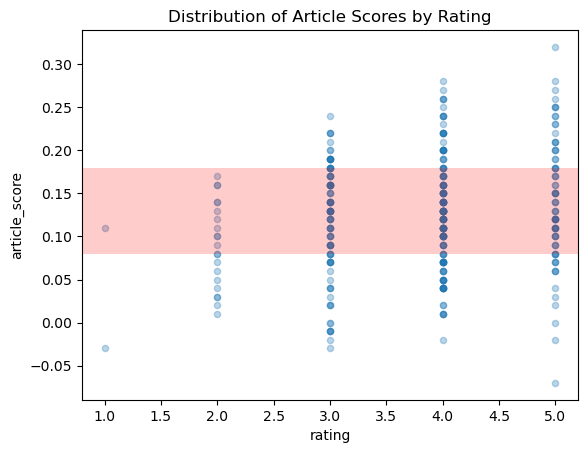

In [31]:
df.plot(x='rating', y='article_score', kind='scatter', alpha=0.3, title='Distribution of Article Scores by Rating')
y1 = 0.18
y2 = 0.08
plt.axhspan(y1, y2, color='red', alpha=0.2, lw=0)
plt.show()

And now we repeat the process with the titles:

In [32]:
label = []
score = []
subjectivity = []
title_pos = []
title_neg = []

for index, review in df.iterrows():
    text = review['article_title']
    doc = nlp(text)
    sentiment = round(doc._.blob.polarity, 2)
    subj = round(doc._.blob.subjectivity, 2)
    
    if sentiment > 0:
        sent_label = 'Positive'
    else:
        sent_label = 'Negative'
        
    label.append(sent_label)
    score.append(sentiment)
    subjectivity.append(subj)
    
    for x in doc._.blob.sentiment_assessments.assessments:
        if x[1] > 0:
            title_pos.append(x[0][0])
        elif x[1] < 0:
            title_neg.append(x[0][0])
        else:
            pass
        
df['title_score'] = score
df['title_label'] = label
df['title_subjectivity'] = subjectivity
df

,article_title,body,rating,rating_sent,show_title,article_score,article_label,article_subjectivity,title_score,title_label,title_subjectivity
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window,0.19,Positive,0.48,0.0,Negative,0.00
1,'Alex Edelman: Just For Us' review — solo show...,"Read our five-star review of ', 'Just For Us',...",5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.50
2,'Back to the Future' review — 1.21 gigawatts o...,"Read our four-star review of ', 'Back to the F...",4,Very Good,Back to the Future,0.08,Positive,0.38,0.1,Positive,0.11
3,'The Cottage' review — an over-the-top comedy ...,"Read our four-star review of ', 'The Cottage',...",4,Very Good,The Cottage,0.13,Positive,0.53,-0.5,Negative,1.00
4,'Purlie Victorious' review — hilarious satire ...,"Read our five-star review of ', 'Purlie Victor...",5,Excellent,Purlie Victorious: A Non-Confederate Romp Thro...,0.09,Positive,0.40,0.5,Positive,1.00
...,...,...,...,...,...,...,...,...,...,...,...
353,Review of Fiddler on the Roof (in Yiddish) at ...,"Full disclosure - I saw Zero Mostel in', 'Fidd...",4,Very Good,Fiddler on the Roof,0.16,Positive,0.43,0.0,Negative,0.00
354,Review of the Public Theater's Shakespeare in ...,"This production of ', 'Much Ado About Nothing'...",5,Excellent,Much Ado About Nothing,0.23,Positive,0.52,0.1,Positive,0.13
355,Latin History for Morons,NOTE: This is a review of the Off-Broadway pre...,4,Very Good,Latin History for Morons,0.07,Positive,0.48,-0.8,Negative,1.00
356,The Piano Lesson,This is a production of substance and grace. I...,5,Excellent,The Piano Lesson,0.20,Positive,0.52,0.0,Negative,0.00


In [33]:
df['title_score'].describe()

count    358.000000
mean       0.082793
std        0.245347
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000
Name: title_score, dtype: float64

The numbers are quite different from the body results, let's visualize them below:

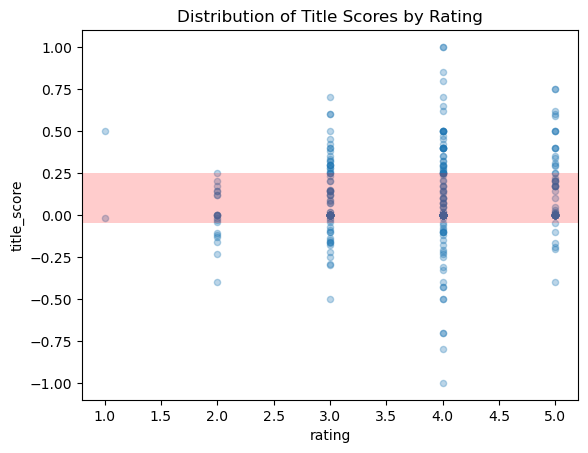

In [34]:
df.plot(x='rating', y='title_score', kind='scatter', alpha=0.3, title='Distribution of Title Scores by Rating')
y1 = 0.25
y2 = -0.05
plt.axhspan(y1, y2, color='red', alpha=0.2, lw=0)
plt.show()

I'm surprised to see the 4 star ratings having such a wide range in score - going from nearly completely negative to completely positive. I doubt the accuracy on this is any good, since the titles are mostly meant to draw the reader in, but fascinating to look at nonetheless!

I'm going to see exactly how much mis-match there is between labels:

In [35]:
unmatched = []
for index, row in df.iterrows():
    if row['article_label'] != row['title_label']:
        unmatched.append(index)
print(len(unmatched))

205


I am simultaneously very surprised and not surprised at all. Sheesh.

In [36]:
for index, row in df.iterrows():
    if row['rating'] < 3:
        df['fixed_sent'] = 'Negative'
    else:
        df['fixed_sent'] = 'Positive'

In [37]:
unmatched2 = []
for index, row in df.iterrows():
    if row['fixed_sent'] != row['title_label']:
        unmatched2.append(index)
print(len(unmatched2))

210


Yeah, that's expected. Basically the same as the mismatch with the spaCy body labels.

In [38]:
unmatched3 = []
for index, row in df.iterrows():
    if row['fixed_sent'] != row['article_label']:
        unmatched3.append(index)
print(len(unmatched3))

13


And of course, the column with the most data to analyze is the most accurate! It's crazy the differences between them, though.

I want to see the subjectivity of the articles and titles, so I'll plot those below:

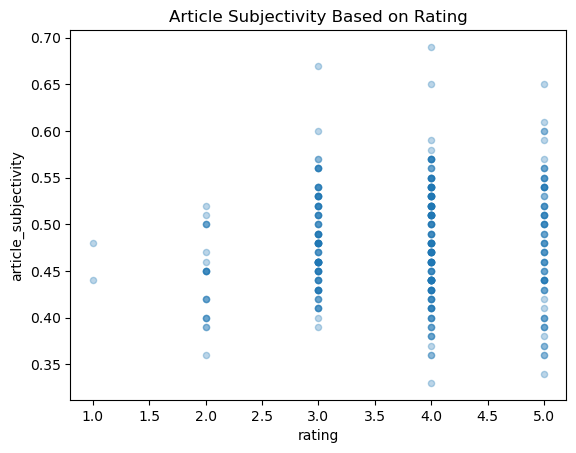

In [39]:
df.plot(x='rating', y='article_subjectivity', kind='scatter', alpha=0.3, title='Article Subjectivity Based on Rating')
plt.show()

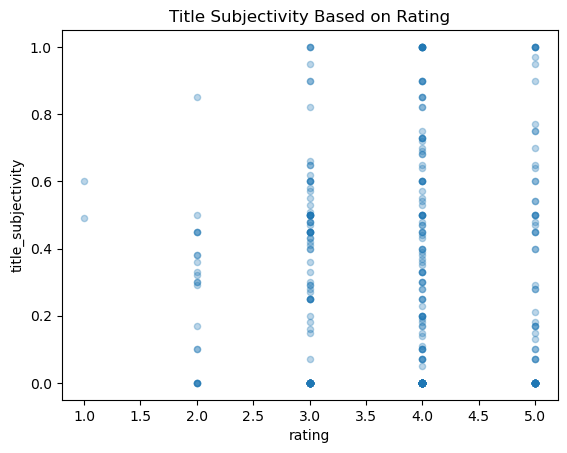

In [40]:
df.plot(x='rating', y='title_subjectivity', kind='scatter', alpha=0.3, title='Title Subjectivity Based on Rating')
plt.show()

I love the spread on the title subjectivity, and I'm especially curious about the titles with higher subjectivities. I take a look at some below:

In [41]:
list(df[df['title_subjectivity'] >= 0.8]['article_title'])

["'The Cottage' review — an over-the-top comedy funhouse",
 "'Purlie Victorious' review — hilarious satire still zings after 60 years",
 "'Peter Pan Goes Wrong' review — never-ending laughs abound in this Neverland",
 "'Between Riverside and Crazy' review — superb cast of characters searches for stability",
 "'Ain't No Mo' review — talented ensemble takes flight in this sharp Broadway comedy",
 "'Funny Girl' review — Lea Michele is the greatest star in her triumphant Broadway return",
 "'A Christmas Carol' review — Jefferson Mays's inventive solo adaptation is a holiday blessing",
 "'Cost of Living' review — a beautifully acted drama about connection and class",
 "'Leopoldstadt' review — Tom Stoppard paints a masterful, memorable family portrait",
 "'Funny Girl' review — Beanie Feldstein-led revival is a comedy promise unfulfilled",
 "'Dana H.' review - an affecting, 'spectacularly executed' work",
 '‘Chicken & Biscuits’ review – a funny, familial feast of a show',
 "‘Pass Over’ Broadw

I'll take a look at the least subjective titles as well:

In [42]:
list(df[df['title_subjectivity'] <= 0.15]['article_title'])

["'Melissa Etheridge: My Window' review — a celebration of the singer's truest self",
 "'Back to the Future' review — 1.21 gigawatts of fun, heart, and spectacle",
 "'The Sign in Sidney Brustein's Window' review — Lorraine Hansberry's play holds a mirror to the world",
 "'Summer, 1976' review — Laura Linney and Jessica Hecht share a breezy summer friendship",
 "'Bob Fosse's Dancin' review — a testament to the joy of theatrical dance",
 "'Life of Pi' review — a marvel of theatrical design",
 "'Sweeney Todd' review — Josh Groban-led revival doesn't frighten, but still thrills",
 "'Shucked' review — the countrified, comedic cream of the crop",
 "'Ohio State Murders' review — Audra McDonald chills and thrills in Adrienne Kennedy drama",
 "'The Collaboration' review — Paul Bettany and Jeremy Pope resurrect Warhol and Basquiat",
 "'A Doll's House' review — Jessica Chastain takes flight in Ibsen revival",
 "'Pictures From Home' review — family drama captures the challenges of art and mortalit

Some of these least subjective article titles seem...a little out of place, showing more subjectivity than I think the classifier rated them at, but this brings me to my next question: what are the top reoccurring positive and negative words? 

In [43]:
agg_pos = article_pos + title_pos
agg_neg = article_neg + title_neg

In [44]:
Counter(agg_pos).most_common(10)

[('new', 1052),
 ('more', 527),
 ('love', 300),
 ('most', 298),
 ('first', 265),
 ('own', 259),
 ('much', 239),
 ('best', 169),
 ('many', 166),
 ('young', 161)]

I don't think I necessarily want to count 'new' in this list because it could easily be part of 'New York' (and likely is, considering it shows up double the amount of times as the next common word), and the drop in occurances from 500 to 300 is also interesting, considering how the rest of the list declines in number a lot more gradually. I'll take a slice starting from index 2 instead of 0 and take a look at those words. 

In [45]:
Counter(agg_pos).most_common()[2:12]

[('love', 300),
 ('most', 298),
 ('first', 265),
 ('own', 259),
 ('much', 239),
 ('best', 169),
 ('many', 166),
 ('young', 161),
 ('right', 151),
 ('good', 136)]

This definitely feels like a better reflection of the articles, and I don't see any surprises in this list. Let's move on to the negative words:

In [46]:
Counter(agg_neg).most_common(10)

[('other', 291),
 ('black', 233),
 ('little', 214),
 ('down', 182),
 ('center', 126),
 ('long', 120),
 ('few', 88),
 ('less', 87),
 ('small', 83),
 ('past', 80)]

I'm surprised at the difference in counts between the two lists! We already hit 80 in the first 10 for negative words - I'm going to look at the length of each one.

In [47]:
print(len(agg_pos), len(agg_neg))

12110 5499


That definitely explains it! It also makes sense considering our data, with positive reviews very heavily outweighing the bad.

In order to properly generate any insights on popular theatrical productions and their ratings, I'm going to merge the two dataframes together and then take the mean of that dataframe:

In [48]:
final = df.merge(playbill_df, on='show_title', how='inner')
final.drop(columns=['article_title', 'body', 'year'], inplace=True)
final

,rating,rating_sent,show_title,article_score,article_label,article_subjectivity,title_score,title_label,title_subjectivity,fixed_sent,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
0,5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.5,Positive,329599.0,58.44,179.0,5640,867,7,92.93
1,5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.5,Positive,425090.0,74.95,179.0,5672,903,7,89.73
2,5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.5,Positive,435394.0,80.05,179.0,5439,849,7,91.52
3,5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.5,Positive,490517.0,77.33,179.0,6343,881,8,90.05
4,5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.5,Positive,569002.0,77.63,179.0,7330,975,8,93.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11469,5,Excellent,Avenue Q,0.21,Positive,0.44,0.0,Negative,0.0,Positive,322213.0,61.00,200.0,5282,796,8,82.95
11470,5,Excellent,Avenue Q,0.21,Positive,0.44,0.0,Negative,0.0,Positive,296972.0,60.95,200.0,4872,796,8,76.51
11471,5,Excellent,Avenue Q,0.21,Positive,0.44,0.0,Negative,0.0,Positive,332180.0,61.40,200.0,5410,796,8,84.96
11472,5,Excellent,Avenue Q,0.21,Positive,0.44,0.0,Negative,0.0,Positive,430303.0,76.04,200.0,5659,796,8,88.87


In [49]:
agg_final = round(final.groupby('show_title').mean(numeric_only=True), 2)
agg_final

,rating,article_score,article_subjectivity,title_score,title_subjectivity,week_gross,avg_ticket,top_ticket,seats_sold,seats_in_theater,num_performances,capacity_filled
show_title,,,,,,,,,,,,
& Juliet,4.00,0.13,0.48,0.25,0.25,1105813.55,141.34,329.08,7817.06,1026.67,7.44,96.98
1776,4.00,0.15,0.40,0.00,0.00,288081.72,48.56,121.00,6629.61,1158.21,6.92,78.75
A Christmas Carol,3.67,0.17,0.54,0.28,0.53,513581.86,74.35,193.57,7313.27,1127.69,6.46,83.48
A Doll's House,5.00,0.11,0.59,0.00,0.00,518862.43,76.04,161.57,6613.22,987.40,6.42,91.69
A Raisin in the Sun,4.00,0.06,0.44,0.00,0.00,806486.30,103.31,217.62,7782.63,1062.00,5.77,94.96
...,...,...,...,...,...,...,...,...,...,...,...,...
Waitress,3.00,0.18,0.45,0.00,0.00,857129.79,115.66,265.89,7348.21,1044.24,7.75,89.10
Walking with Ghosts,3.00,0.16,0.43,0.00,0.00,189822.70,53.11,297.00,3576.40,975.00,5.00,56.01
West Side Story,3.00,0.07,0.54,0.00,0.00,1024862.34,89.04,310.77,11313.21,1701.39,6.98,83.89


Heatmaps are probably my favorite visualization when it comes to identifying correlations between values, so I quickly make one of the aggregated dataframe below:

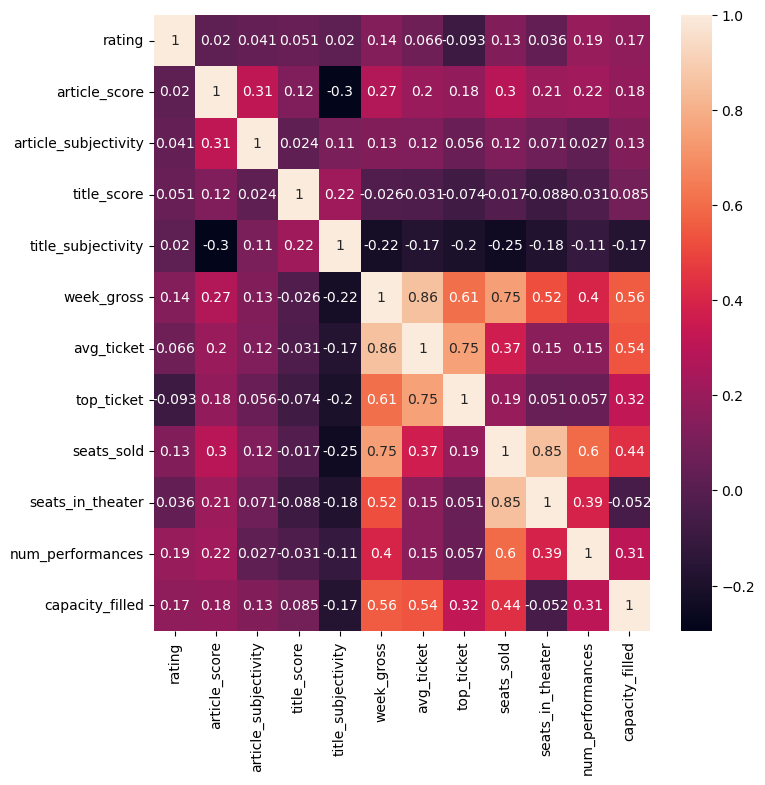

In [50]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(agg_final.corr(numeric_only=True), annot=True)
plt.show()

There isn't as strong of a correlation between the reviews and show stats as I was expecting, but there may be some merit in an article's score and the weekly gross and number of seats sold!

Just so I can easily come back to these dataframes, I export them to csv's so that we can finish up our analysis in the modeling notebook!

In [51]:
agg_final.to_csv('agg_final.csv')

In [52]:
df.to_csv('spacy_results.csv')